<a href="https://colab.research.google.com/github/Bob-Gohardani/nlp-ml/blob/main/spam_detector_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [3]:
# we use special encoding since some characters here are not standard
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

# these columns are empty so we just drop them
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [4]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# # rename the columns from v1 and v2
df.columns = ['labels', 'data']

In [6]:
# create binary labels from ham/spam
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})

In [7]:
df.head(1)

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0


In [8]:
Y = df['b_labels'].values

In [9]:
# here we create an object of count vectorizer class
count_vectorizer = CountVectorizer(decode_error="ignore")

# here we get string data, count each word and find its probability based on the repetition and whole count of words
X = count_vectorizer.fit_transform(df['data'])

In [10]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33)

In [11]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print(model.score(Xtrain, Ytrain))
print(model.score(Xtest, Ytest))

0.994106616662202
0.9847743338771071


In [12]:
# visualize the data to see the most frequent words in spam and ham
def visualize(label):
  words = ''
  for msg in df[df['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '
  
  wordcloud = WordCloud(width=600, height=400).generate(words)

  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

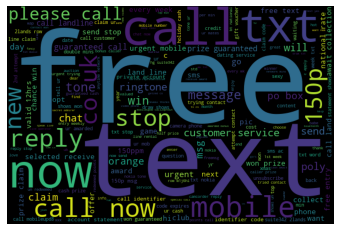

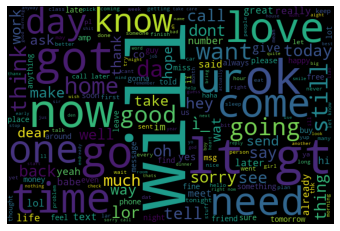

In [13]:
visualize('spam')
visualize('ham')

In [14]:
df['predictions'] = model.predict(X)

In [15]:
# where we have different predictions and actual labels get the text
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']

for msg in sneaky_spam:
  print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Ever thought about living a good life with a perfect partner? Just txt back NAME and AGE to join the mobile community. (100p/SMS)
Talk sexy!! Make new friends or fall in love in the worlds most discreet text dating service. Just text VIP to 83110 and see who you could meet.
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
How about getting in touch with folks waiting for company? Just txt back your NAME and AGE to opt in! Enjoy the community (150p/SMS)
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmo

In [16]:
# where we have different predictions and actual labels get the text
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
  print(msg)

Waiting for your call.
\Pete can you please ring meive hardly gotany credit\""
\Hello-/@drivby-:0quit edrunk sorry iff pthis makes no senrd-dnot no how ^ dancce 2 drum n basq!ihave fun 2nhite x ros xxxxxxx\""
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Yalru lyfu astne chikku.. Bt innu mundhe lyf ali halla ke bilo (marriage)program edhae, so lyf is nt yet ovr chikku..ali vargu lyfu meow meow:-D
Host-based IDPS for linux systems.
Yavnt tried yet and never played original either
Ultimately tor motive tui achieve korli.
staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
Boy; I love u Grl: Hogolo Boy: gold chain kodstini Grl: Agalla Boy: necklace madstini Grl: agalla Boy: Hogli 1 mutai eerulli kodthini! Grl: I love U kano;-)
Cps is causing the outages to conserve energy.
Unlimited texts. Limited minutes.
\GRAN ONLYFOUND OUT AFEW DAYS AGO.CUSOON HONI\""
Mathews or tait